# Q2 - Brain Image Segmenation

In [7]:

import numpy as np, cv2 as cv, matplotlib.pyplot as plt
from pathlib import Path

DATA = Path("../data")
RESULTS = Path("../results/q2")
RESULTS.mkdir(parents=True, exist_ok=True)

img_path = DATA / "a1images" / "brain_proton_density_slice.png"  # place the image here
img = cv.imread(str(img_path), cv.IMREAD_GRAYSCALE)
assert img is not None, f"Image not found at {img_path}"
print("Input shape:", img.shape)

Input shape: (217, 181)


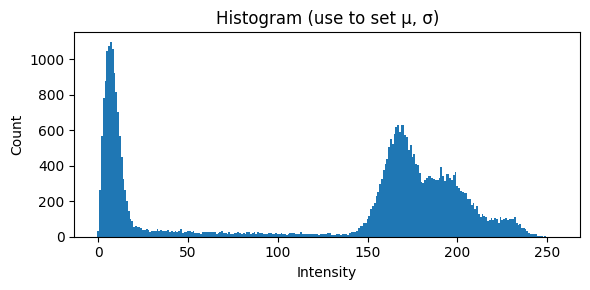

In [8]:
# Plot histogram to guide μ and σ choices
hist = cv.calcHist([img], [0], None, [256], [0, 256]).ravel()
plt.figure(figsize=(6, 3))
plt.bar(np.arange(256), hist, width=1)
plt.title("Histogram (use to set μ, σ)")
plt.xlabel("Intensity")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(RESULTS/"histogram.png", dpi=150, bbox_inches="tight")
plt.show()

In [9]:
# Parameters (tune by histogram)
mu_g, lw_g, rw_g = 150, 40, 40    # center, left width, right width
peak_val = 255

# Compute segment bounds (clamped)
L = max(0, mu_g - lw_g)
P = mu_g
R = min(255, mu_g + rw_g)

# Initialize LUT
lut_gm = np.zeros(256, dtype=np.uint8)

# Rising edge: L → P maps 0 → peak_val
lut_gm[L:P+1] = np.linspace(0, peak_val, (P - L + 1)).astype(np.uint8)

# Falling edge: P → R maps peak_val → 0
lut_gm[P:R+1] = np.linspace(peak_val, 0, (R - P + 1)).astype(np.uint8)

# Apply LUT
img_gm = cv.LUT(img, lut_gm)

# Save outputs
cv.imwrite(str(RESULTS/"q2_output_gm.png"), img_gm)

True

In [10]:
# Parameters (tune by histogram)
mu_w, lw_w, rw_w = 200, 40, 40    # center, left width, right width
peak_val = 255

# Compute segment bounds (clamped)
L = max(0, mu_w - lw_w)
P = mu_w
R = min(255, mu_w + rw_w)

# Initialize LUT
lut_wm = np.zeros(256, dtype=np.uint8)

# Rising edge: L → P maps 0 → peak_val
lut_wm[L:P+1] = np.linspace(0, peak_val, (P - L + 1)).astype(np.uint8)

# Falling edge: P → R maps peak_val → 0
lut_wm[P:R+1] = np.linspace(peak_val, 0, (R - P + 1)).astype(np.uint8)

# Apply LUT
img_wm = cv.LUT(img, lut_wm)

# Save outputs
cv.imwrite(str(RESULTS/"q2_output_wm.png"), img_wm)

True

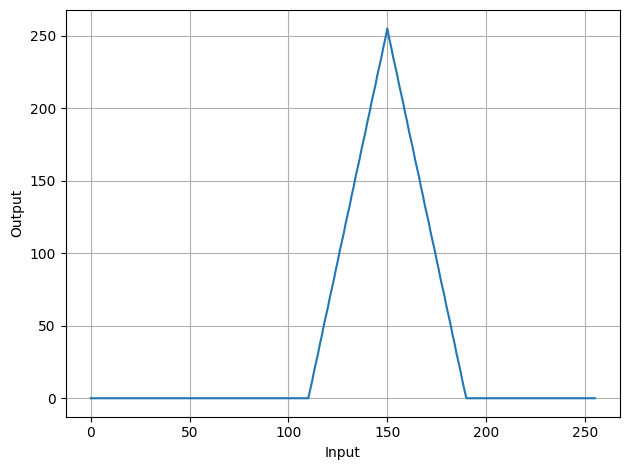

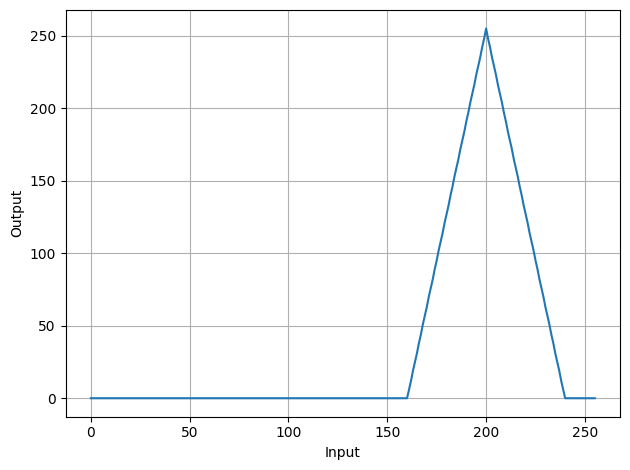

In [11]:
xs = np.arange(256)
plt.figure()
plt.plot(xs, lut_gm)
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)
plt.tight_layout()
plt.savefig(RESULTS/"q2_transform_GM.png", dpi=150, bbox_inches="tight")
plt.show()

plt.figure()
plt.plot(xs, lut_wm)
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)
plt.tight_layout()
plt.savefig(RESULTS/"q2_transform_WM.png", dpi=150, bbox_inches="tight"); plt.show()

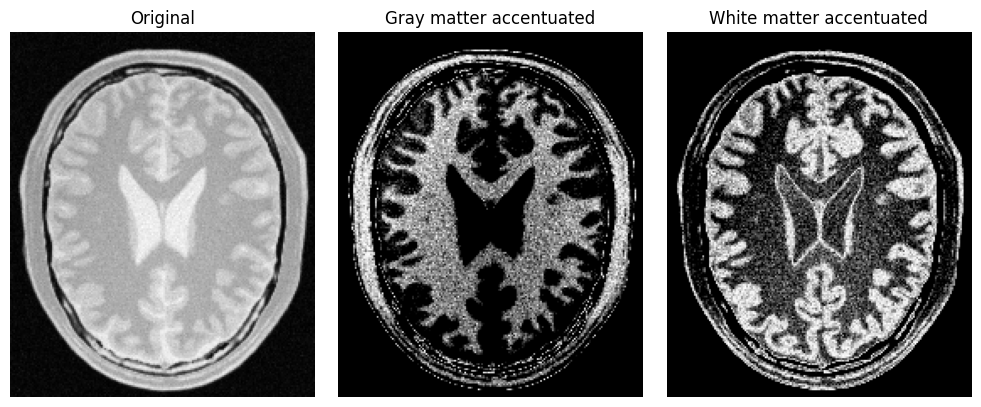

In [12]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(img_gm, cmap='gray')
plt.title("Gray matter accentuated")
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(img_wm, cmap='gray')
plt.title("White matter accentuated")
plt.axis('off')
plt.tight_layout()
plt.savefig(RESULTS/"q2_original_gray_white.png", dpi=150, bbox_inches="tight"); plt.show()